<a href="https://colab.research.google.com/github/Rengadurai08/CREDIT-CARD-FRAUD-DETECTION/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

print("All libraries successfully imported.")

All libraries successfully imported.


Loading the data set

In [65]:
df_creditcard = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

First 5 rows of the data set

In [66]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
pd.options.display.max_columns = None

In [68]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
df_creditcard.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [71]:
df_creditcard['Class'].value_counts()

,count
Class,
0,284315
1,492


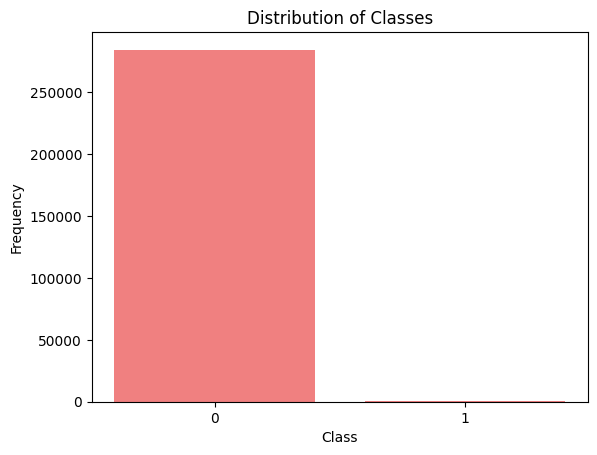

In [72]:
class_counts = df_creditcard['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color='lightcoral')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(class_counts.index)
plt.show()


In [74]:
legit = df_creditcard[df_creditcard.Class == 0]
fraud = df_creditcard[df_creditcard.Class == 1]

In [75]:
print("Legitimate Transactions: ", legit.shape)
print("Fraudulent Transactions: ", fraud.shape)

Legitimate Transactions:  (284315, 31)
Fraudulent Transactions:  (492, 31)


Descriptive statistics for Amount in legitimate and fraudulent transactions

In [76]:
print("Legitimate transaction statistics:\n", legit['Amount'].describe())

Legitimate transaction statistics:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [77]:
print("\nFraudulent transaction statistics:\n", fraud['Amount'].describe())


Fraudulent transaction statistics:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [78]:
df_creditcard.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Lets build a sample dataset containing same distribution of legit and fruad transactions

In [79]:
legit_sample = legit.sample(n=492)

In [80]:
new_df = pd.concat([legit_sample, fraud], axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30612,36010.0,0.844385,-0.558780,1.661915,1.894801,-1.210705,0.719342,-0.721655,0.302124,1.382366,-0.502473,-0.742813,1.531203,0.692386,-1.113999,-1.575777,-1.044737,0.716329,-1.087936,-0.233022,0.048327,-0.064519,0.160675,-0.078141,0.459086,0.419138,-0.326205,0.103122,0.055777,108.00,0
53726,46119.0,1.002846,-0.571202,1.014653,0.039201,-0.364259,1.663796,-0.946424,0.628372,1.126772,-0.660254,0.232232,1.160287,0.296219,-0.510912,0.744736,-1.403488,1.326537,-2.629666,-1.091739,-0.165723,-0.102766,0.109465,0.193199,-0.864125,-0.169261,1.068177,0.038103,0.002513,20.00,0
110431,71822.0,-0.225569,0.324879,1.512749,-1.405964,-0.506233,-0.473711,0.041930,-0.168195,-1.290432,0.258834,-0.712337,-0.549085,1.354231,-0.663699,0.612426,1.217706,-0.067672,-0.859216,0.681847,0.195796,0.425695,1.169296,-0.367026,-0.042286,0.197474,-0.052107,-0.054055,0.048470,15.00,0
65423,51575.0,-14.904340,12.793880,-7.888739,0.512373,-7.661829,16.614054,-31.764946,-73.216718,-6.290730,-14.741096,-3.038237,7.848392,-5.791881,10.526766,-4.097947,5.477283,3.049153,1.542720,-4.289382,16.756448,-34.830382,10.503090,4.245073,-1.412813,-0.730374,0.133557,-0.394370,0.942177,500.00,0
30163,35803.0,-0.397329,1.130303,0.690190,0.841516,-0.015825,0.001245,0.312207,0.491336,-1.096510,-0.286392,1.416990,1.287544,0.831134,0.685778,0.441230,-0.278314,-0.063200,0.073214,0.263436,-0.056468,0.275858,0.714083,0.004146,0.048415,-0.199046,-0.319030,-0.033493,-0.028381,32.02,0


In [81]:
new_df['Class'].value_counts()

,count
Class,
0,492
1,492


In [82]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95041.081301,-0.151096,0.042610,-0.075167,-0.032988,0.007363,0.012004,-0.091783,-0.155134,-0.026429,0.026552,0.034628,-0.037740,0.013407,0.118648,0.017210,0.018297,0.042470,-0.047585,-0.014701,0.067406,-0.086480,0.010330,0.031646,-0.002433,-0.005795,-0.009433,-0.023177,-0.005978,86.553455
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Dividing the dataset into Features and Targets

In [83]:
X = balanced_df.drop(columns='Class', axis=1)
Y = balanced_df['Class']
print("\nFeatures (X):\n", X.head())
print("\nTarget (Y):\n", Y.head())


Features (X):
             Time        V1        V2        V3        V4        V5        V6  \
31994    36596.0  1.320556 -1.199502  0.137186 -1.244392 -1.464716 -1.067647   
281944  170550.0  0.024549  0.776909  0.141314 -0.800282  0.663609 -0.499506   
103619   68735.0  1.275826  0.106880  0.167476  0.320184 -0.108218 -0.218960   
97352    66181.0 -2.483505  2.119152  0.087038 -2.315701  0.421964  0.581405   
24955    33458.0 -3.239671 -3.092851 -0.654837  0.804652 -4.860734  2.560198   

              V7        V8        V9       V10       V11       V12       V13  \
31994  -0.578540 -0.376498 -2.077955  1.391275 -0.350880 -0.509604  1.234632   
281944  0.854309  0.012252 -0.222401 -0.237319  0.403692  0.521947 -0.372148   
103619 -0.127018  0.051234 -0.006907  0.133886  0.573382  0.254645 -0.622359   
97352   0.339130  0.458953  1.575820  2.076544 -0.003205 -0.117554 -0.419284   
24955   4.248399 -0.134821  0.167771 -1.421991  0.358230  0.302782 -0.269192   

             V14      

Splitting the data into Training and Testing data

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (787, 30), X_test shape: (197, 30)


In [85]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print("Model training completed.")

Model training completed.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualizing

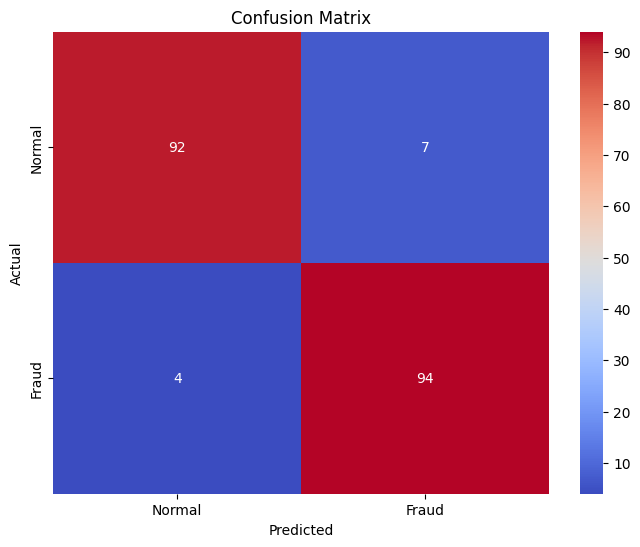

In [86]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
LABELS = ["Normal", "Fraud"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=LABELS, yticklabels=LABELS)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Evaluation

In [87]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_pred)
print(f"\nTraining Accuracy: {train_accuracy}")


Training Accuracy: 0.9415501905972046


In [88]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9441624365482234


The Conclusion

In [89]:
if test_accuracy > 0.9:
    print("\nThe model is performing well with high accuracy.")
else:
    print("\nThe model accuracy could be improved further.")


The model is performing well with high accuracy.
